**Importing libraries required for the Assignment**

In [1]:
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_set=torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
ImgData=train_set.data
labels=train_set.targets

Files already downloaded and verified


**Load 30 images in a Matrix**

In [3]:
imgs=np.zeros((10,1))
imgs=imgs.tolist()
imageLabels= labels
for j in range(1000):
    i=j+30000
    label=imageLabels[i]
    if(len(imgs[label])>3):continue
    elif(len(imgs[label])==1 and type(imgs[label])==int):
      imgs[label]=ImgData[i]
    else:
      imgs[label].append(ImgData[i])
for i in range(0,10):
    del(imgs[i][0])

**1ST QUESTION**

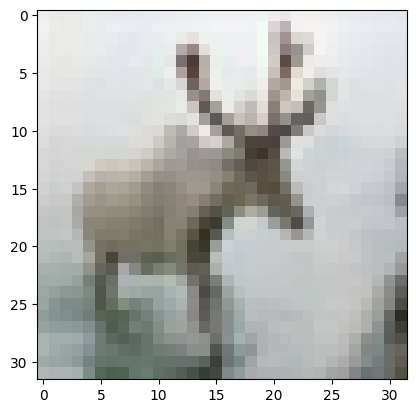

In [4]:
# loading image to variable im and plotting it 
img=np.array(imgs[4][2])
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


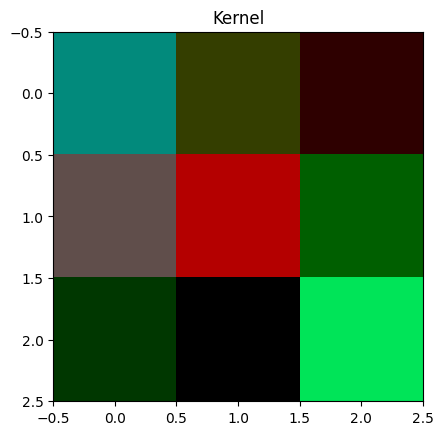

In [5]:
# randomising seed
np.random.seed(50)
# creating a kernel of dimension 3x3x3 and shifting it in such a way that, the kernl has values between (-1,1)
kernel=np.random.rand(3,3,3)*(-2) + 1
# Plotting kernel
plt.title("Kernel")
plt.imshow(kernel)

In [6]:
# ConvolveIt is a function, which makes a 3d convolution of 'img' starting from index (xStartIndex,yStartIndex)  and 'kernel'
def ConvolveIt(img,xStartIndex,yStartIndex,kernel):
  sum=0
  h,w,channel=kernel.shape
  for i in range(0,w):
      for j in range(0,h):
        for c in range(0,channel):
           sum=np.add(sum,np.multiply(img[i+xStartIndex][j+yStartIndex][c],kernel[i][j][c]))
  return sum

# PaddedImage is a function which pads the image with default value [0,0]
def PaddedImage(img,padding=[0,0]):
  return np.pad(img,((padding[0],padding[0]),
                     (padding[1],padding[1]),(0,0)))

# ConvolveTotalImage convolves the total image kernel wise
def ConvolveTotalImage(img,kernel,stride,padding=[0,0]):
  img=PaddedImage(img,padding)
  W,H,ch=img.shape
  w,h,ch2=kernel.shape
  finalImage=np.empty([int(np.floor((W-w)/stride[0]))+1,int(np.floor((H-h)/stride[1]))+1])
  h_final=finalImage.shape[1]
  w_final=finalImage.shape[0]
  for i in range(0,w_final,stride[0]):
        for j in range(0,h_final,stride[1]):
          finalImage[i][j]=int(ConvolveIt(img,i,j,kernel))%256
  return finalImage

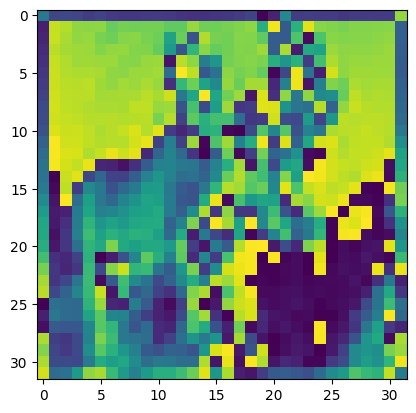

In [7]:
stride=[1,1]
padding=[1,1]
outputImage=ConvolveTotalImage(img,kernel,stride,padding)
plt.imshow(outputImage)

In [8]:
def sigmoid(x):
  return 1/(np.exp(-x)+1)

def normaliseSigmoid(z):   
  x=(z-np.min(z))/(np.max(z)-np.min(z))
  return 1/(np.exp(-x)+1)

def tanh(x):
  x=(z-np.min(z))/(np.max(z)-np.min(z))
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def normaliseTanh(z):
  x=(z-np.min(z))/(np.max(z)-np.min(z))
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def ReLU(x):

  if(x>=0):
    return x
  else:
    return 0
vReLU = np.vectorize(ReLU)

def PReLU(x,a=0.05):
  if(x>=0):
    return x
  else:
    return a*x
vPReLU = np.vectorize(PReLU)

def Activate(activatedMap,activationFunction=None):
  if(activationFunction=='sigmoid'):
    return sigmoid(activatedMap)
  elif(activationFunction=='tanh'):
    return tanh(activatedMap)
  elif(activationFunction=='ReLU'):
    return vReLU(activatedMap)
  elif(activationFunction=='PReLU'):
    return vPReLU(activatedMap)
  return activatedMap

In [9]:
sigOutput=normaliseSigmoid(outputImage)
tanhOutput=normaliseTanh(outputImage)
ReLUOutput = vReLU(outputImage)
PReLUOutput=vPReLU(outputImage)

verifying

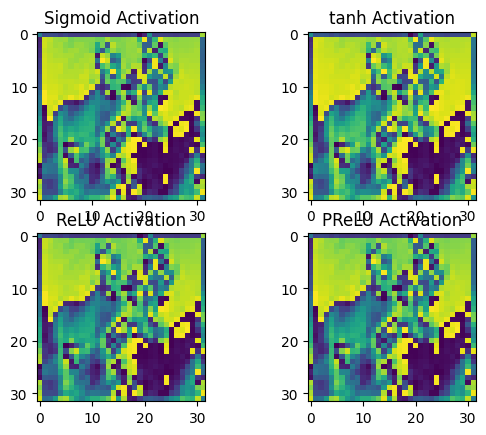

In [10]:
plt.subplot(2,2,1)
plt.title("Sigmoid Activation")
plt.imshow(sigOutput)
plt.subplot(2,2,2)
plt.title("tanh Activation")
plt.imshow(tanhOutput)
plt.subplot(2,2,3)
plt.title("ReLU Activation")
plt.imshow(ReLUOutput)
plt.subplot(2,2,4)
plt.title("PReLU Activation")
plt.imshow(PReLUOutput)
plt.show()
# plt.imshow(PReLUOutput - tanhOutput)
# plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


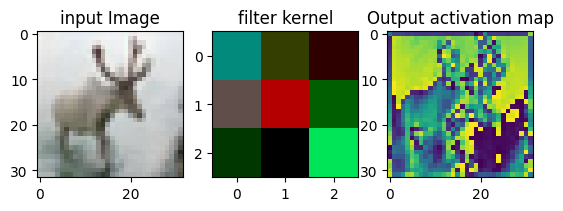

In [11]:
# inputImage is a 3 channel input
def ConvolutionFunction(img,kernel,stride,padding,actFunc):
    return Activate(ConvolveTotalImage(img,kernel,stride,padding),actFunc)
inputImage=imgs[4][2]
inputImage =np.array(inputImage)
outputActMap=ConvolutionFunction(inputImage,kernel,[1,1],[1,1],actFunc='ReLU')
plt.subplot(1,3,1)
plt.title("input Image")
plt.imshow(inputImage)
plt.subplot(1,3,2)
plt.title("filter kernel")
plt.imshow(kernel)
plt.subplot(1,3,3)
plt.title("Output activation map")
plt.imshow(outputActMap)
plt.show()

**2ND QUESTION**

In [12]:
# a function which does minPooling, of a part of a 2D matrix A starting from element of index (xStartIndex,yStartIndex) with kernel of default size 2
def MinPoolIt(A,xStartIndex,yStartIndex,kernel_size=2):
  min=A[xStartIndex][yStartIndex]
  sum=0
  w=kernel_size
  h=kernel_size
  for i in range(0,w):
      for j in range(0,h):
          if(min>A[i+xStartIndex][j+yStartIndex]):
            min=A[i+xStartIndex][j+yStartIndex]
  return min

# a function which does minpooling of a 2D image with a pooling size
def MinPooling2D(A, kernel_size=2,stride=[2,2]):
  W,H=A.shape
  w=kernel_size
  h=kernel_size
  final_image=np.empty([int((W-w)/stride[0])+1,int((H-h)/stride[1])+1])
  w_final=final_image.shape[0]
  h_final=final_image.shape[1]
  for i in range(0,(w_final)*stride[0],stride[0]):
    for j in range(0,(h_final)*stride[1],stride[1]):
      final_image[int(i/(stride[0]))][int(j/(stride[1]))]=MinPoolIt(A,i,j,kernel_size)
  return final_image

# a function which does avgPooling, of a part of a 2D matrix A starting from element of index (xStartIndex,yStartIndex) with kernel of default size 2
def AvgPoolIt(A,xStartIndex,yStartIndex,kernel_size=2):
  sum=0
  w=kernel_size
  h=kernel_size
  for i in range(0,w):
      for j in range(0,h):
            sum+=A[i+xStartIndex][j+yStartIndex]
  return sum/(w*h)

# a function which does avgpooling of a 2D image with a pooling size
def AvgPooling2D(A, kernel_size=2,stride=[2,2]):
  W,H=A.shape
  #print(A.shape)
  w=kernel_size
  h=kernel_size
  final_image=np.empty([int((W-w)/stride[0])+1,int((H-h)/stride[1])+1])
  #print(final_image.shape)
  w_final=final_image.shape[0]
  h_final=final_image.shape[1]
  for i in range(0,(w_final)*stride[0],stride[0]):
    for j in range(0,(h_final)*stride[1],stride[1]):
      final_image[int(i/(stride[0]))][int(j/(stride[1]))]=AvgPoolIt(A,i,j,kernel_size)
  return final_image

# a function which does maxPooling, of a part of a 2D matrix A starting from element of index (xStartIndex,yStartIndex) with kernel of default size 2
def MaxPoolIt(A,xStartIndex,yStartIndex,kernel_size=2):
  max=A[xStartIndex][yStartIndex]
  w=kernel_size
  h=kernel_size
  for i in range(0,w):
      for j in range(0,h):
          if(max<A[i+xStartIndex][j+yStartIndex]):
            max=A[i+xStartIndex][j+yStartIndex]

  return max


# a function which does maxpooling of a 2D image and with a pooling size
def MaxPooling2D(A, kernel_size=2,stride=[2,2]):
  W,H=A.shape
  w=kernel_size
  h=kernel_size
  final_image=np.empty([int((W-w)/stride[0])+1,int((H-h)/stride[1])+1])
  w_final=final_image.shape[0]
  h_final=final_image.shape[1]
  for i in range(0,(w_final)*stride[0],stride[0]):
    for j in range(0,(h_final)*stride[1],stride[1]):
      final_image[int(i/(stride[0]))][int(j/(stride[1]))]=MaxPoolIt(A,i,j,kernel_size)
  return final_image


# this function pads a 2d image
def PaddedImage2D(img,padding=[0,0]):
  return np.pad(img,((padding[0],padding[0]),
                     (padding[1],padding[1])))

# This is the pooling function of 2 Dimensions, which polls the input image with a pooling size, taking stride and padding and pooling type also as inputs
def Pool2d(A, kernel_size=2, stride=[2,2], padding=[0,0], poolingType='max'):
  A=PaddedImage2D(A)
  if(poolingType=="min"):
     return MinPooling2D(A, kernel_size, stride)
  elif(poolingType=="avg"):
    return AvgPooling2D(A, kernel_size, stride)
  return MaxPooling2D(A, kernel_size, stride)
  

In [13]:
# The pooled Image
pooledImage=Pool2d(outputImage, kernel_size=2, stride=[2,2],poolingType='max')


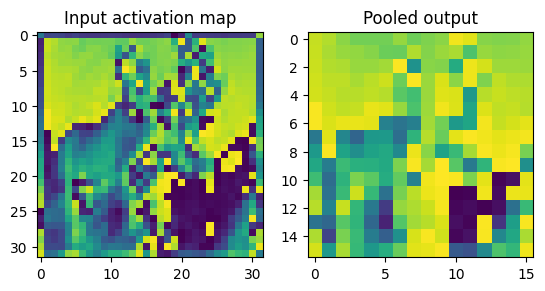

In [14]:
# Displaying the input activation map with pooled output
plt.subplot(1,2,1)
plt.title("Input activation map")
plt.imshow(outputImage)
plt.subplot(1,2,2)
plt.title("Pooled output")
plt.imshow(pooledImage)

**3RD QUESTION**

In [15]:
# a function which accepts input volume,number of filters(kernels is a variable whose first dimension is the number of filters),kernel dimensions,stride,padding and non-linear functio
def ConvolveTotalImageWithAllKernels(img,kernels,stride=[1,1],padding=[0,0],activationFunction=None):
  img=PaddedImage(img,padding)
  listOfFinalSetOfImage=[Activate(ConvolveTotalImage(img,kernels[0],stride),activationFunction)]
  for i in range(1,kernels.shape[0]): 
    listOfFinalSetOfImage.append(Activate(ConvolveTotalImage(img,kernels[i],stride),activationFunction))
  finalSetOfImage=np.stack(tuple(listOfFinalSetOfImage))
  return finalSetOfImage

In [16]:
numberOfFilters=4
kernels=np.random.rand(numberOfFilters,5,5,3)*(-2)+1
output=ConvolveTotalImageWithAllKernels(img,kernels)

Verification: 

In [17]:
# The final output image has dimension of form = numberOfFilters * W * H
# Here numberOfFilters=4
# W=28
# H=28
print(f"The dimensions of the output are {output.shape}")

The dimensions of the output are (4, 28, 28)


**4TH QUESTION**

In [18]:
# It accepts the activation map volume(variable img), the pooling function, the pooling size(variable kernelsize) and stride
# outputs the pooled volume
def PoolTotalImage(img,kernelsize=2,stride=[2,2],poolingType='max'):
  listOfFinalSetOfImage=[Pool2d(img[0],poolingType=poolingType)]
  for i in range(1,img.shape[0]):
    listOfFinalSetOfImage.append(Pool2d(img[i],poolingType=poolingType))
  finalSetOfImage=np.stack(tuple(listOfFinalSetOfImage))
  return finalSetOfImage

In [19]:
outputImage=PoolTotalImage(output)
# NOTE: Here transpose is applied because to make the array contain channels at the last index, which will be used in the following questions
print(f"The  the input and output mapping is of dimension {np.transpose(output,(1,2,0)).shape},{np.transpose(outputImage,(1,2,0)).shape}")


The  the input and output mapping is of dimension (28, 28, 4),(14, 14, 4)


Special Case Of Global Average Pooling

In [20]:
# Applies GAP in a channel(2D)
def GapPool2d(A):
  sum=0
  w,h=A.shape
  for i in range(0,w):
    for j in range(0,h):
      sum+=A[i][j]
  return (sum/(w*h))

# Applies GAP for the comple input activation volume
def Gap(img):
  listOfFinalSetOfImage=[]
  for i in range(0,img.shape[0]):
    listOfFinalSetOfImage.append(GapPool2d(img[i]))
  finalSetOfImage=np.stack(tuple(listOfFinalSetOfImage))
  return finalSetOfImage

In [21]:
# applying GAP 
gapImage=Gap(output)
print(f"The global average pooling is of dimension {gapImage.shape}")

The global average pooling is of dimension (4,)


**5th QUESTION**

In [22]:
# a funtion used to convert an array V of dimension V.shape[0], to an array of dimension w, by returning a matrix vector product
def changeArrayDimensions(V,w):
  h=V.shape[0]
  # Note that here A is a weight matrix associated with the input and output
  A=np.random.random((w,h))
  return A.dot(V)


In [23]:
# UNRAVELLING FUNCTION
def unraveling(img):
        return img.reshape(-1)

In [24]:
# outputImage is obtained from the last question, its dimensions are (4,14,14)
outputOfFlattening=outputImage
print(f"Dimensions of the input activation map is {outputImage.shape}")


# converting outputOfFlattening into a vector
outputOfFlattening=unraveling(outputOfFlattening)
print(f"Dimensions of the output of unravelling function is {outputOfFlattening.shape[0]}")

# converting outputOfFlattening into a vector of dimension 5
outputDimension=5
outputOfFlattening=changeArrayDimensions(outputOfFlattening,outputDimension)
print(f"Dimension of a vector whose input size is {outputOfFlattening.shape[0]} and to be matched output size is 5 is {changeArrayDimensions(outputOfFlattening,outputDimension).shape[0]}")
finalImage=changeArrayDimensions(outputOfFlattening,outputDimension)
# NOTE: Here outputOfFlattening is initially of dimension 784, we are converting it into a vector of dimension 5

Dimensions of the input activation map is (4, 14, 14)
Dimensions of the output of unravelling function is 784
Dimension of a vector whose input size is 5 and to be matched output size is 5 is 5


**6TH QUESTION**

In [25]:
# a function to find dimension of a vector v
def dimension(v):
  v=np.array(v)
  for i in v.shape:
    return i

# Outputs a list which has the outputs of a layer whose number of neurons is dim, preceding layer vector is lastLayerVector, and default activation (variable act) is sigmoid
def OutputOfLayerL(dim,lastLayerVector,act="sigmoid"):
  output=np.empty([dim])
  w=np.random.random((dim))
  for i in range(0,dim):
    sum=0
    for j in range(0,dimension(lastLayerVector)-1):
      sum+=w[i]*lastLayerVector[j]
      sum=Activate(sum,act)
    output[i]=sum
  return output.tolist()

# Takes input vector ,number of hidden layer ,size of each layer,the non-linear function( default sigmoid), and  output vector dimension
def mlp(inputVector,sizeOfEachLayer,numberOfHiddenLayer,outputVectorDimension,act="sigmoid"):
  sizeOfEachHiddenLayer=sizeOfEachLayer
  sizeOfEachLayer=np.append(dimension(inputVector),sizeOfEachHiddenLayer)
  sizeOfEachLayer=np.append(sizeOfEachLayer,outputVectorDimension)
  X=[inputVector.tolist()]
  for i in range (1,numberOfHiddenLayer+2):
    X.append(OutputOfLayerL(sizeOfEachLayer[i],np.array(X[i-1])))
  return np.array(X[dimension(sizeOfEachLayer)-1])

# Applies soft max to output vector x
def softmax(x):
  y=np.empty([dimension(x)])
  din=0
  for i in range(0,dimension(x)):
    y[i]=np.exp(x[i])
    din+=y[i]
  for i in range(0,dimension(y)):
    y[i]=y[i]/din
  return y

In [26]:
# Example
# inputVector is finalImage (5 dimension vector obtained after ravelling and changing dimensions in last question)
inputVector=finalImage

# number of hidden layers=2
numberOfHiddenLayer=2

# size of each hidden layer=[2,2]
# here we took two neurons each in the two hidden layers
sizeOfEachHiddenLayer=np.array([2,2])

# output vector dimension = 3
outputVectorDimension=3
# appling MLP
outputVector=mlp(inputVector,sizeOfEachHiddenLayer,numberOfHiddenLayer,outputVectorDimension)

print(f"Output vector without softmax: {outputVector}")
print(f"Output vector with softmax: {softmax(outputVector)}")

Output vector without softmax: [0.58460815 0.55967495 0.5543572 ]
Output vector with softmax: [0.33949205 0.33113208 0.32937587]


**7TH QUESTION**

In [27]:
def normaliseIt(z):
  return (z-np.min(z))/(np.max(z)-np.min(z))


In [28]:
# • Input image of size 32 × 32 × 3. Use images from the CIFAR-10 dataset.
# img is the input image
img=imgs[0][1]
#• Convolution layer with 16 kernels of size 3 × 3 spatial dimensions and sigmoid activation.
#kernel
numberOfFinalImages=16
kernels=np.random.rand(numberOfFinalImages,3,3,3)*(-2) + 1
img=ConvolveTotalImageWithAllKernels(img,kernels,stride=[1,1],padding=[0,0],activationFunction='sigmoid')
#print(img.shape)

#• Max pooling layer of size 2 × 2 with a stride of 2 along each dimension.
img=PoolTotalImage(img,kernelsize=2,stride=[2,2],poolingType='max')
#print(img.shape)

# • Convolution layer with 8 kernels of spatial size 3 × 3 and sigmoid activation.
img=np.transpose(img,(1,2,0))
numberOfFinalImages=8
kernels=np.random.rand(8,3,3,16)*(-2) + 1
img=ConvolveTotalImageWithAllKernels(img,kernels,stride=[1,1],padding=[0,0],activationFunction='sigmoid')
#print(img.shape)

#• Max pooling layer of size 2 × 2 with a stride of 2 along each dimension.
img=PoolTotalImage(img,kernelsize=2,stride=[2,2],poolingType='max')

# • A Global Average Pooling (GAP) layer.
img=Gap(img)

# • An MLP with one hidden layer (size same as input) that accepts as input the previous layer’s
#output and maps it to 10 output nodes. Use sigmoid activation for the MLP (softmax in the
#o/p layer).

inputVector=img 
inputVector=normaliseIt(inputVector)
outputVector=softmax(mlp(inputVector,np.array(inputVector.shape[0]),1,10))


In [29]:
# A function which effectively implements the feed-forward path in CNN 
def FFP(img):
  img=ConvolveTotalImageWithAllKernels(img,np.random.rand(16,3,3,3)*(-2) + 1,stride=[1,1],padding=[0,0],activationFunction='sigmoid')
  img=PoolTotalImage(img,kernelsize=2,stride=[2,2],poolingType='max')
  img=np.transpose(img,(1,2,0))
  img=ConvolveTotalImageWithAllKernels(img,np.random.rand(8,3,3,16)*(-2) + 1,stride=[1,1],padding=[0,0],activationFunction='sigmoid')
  img=PoolTotalImage(img,kernelsize=2,stride=[2,2],poolingType='max')
  img=Gap(img)
  img=normaliseIt(img)
  # here normalise after GAP because the values we obtain after GAP are very diversely spread( some are of order 1e310, and some are of order 1e1)
  outputVector=softmax(mlp(inputVector,np.array(inputVector.shape[0]),1,10))
  return outputVector

VERIFICATION:

In [30]:
# Example 1:
input1=imgs[1][2]
outputVector1=FFP(input1)
print(f"Output vector for 1st image {outputVector1}")

# Example 2:
input2=imgs[7][1]
outputVector2=FFP(input2)
print(f"Output vector for 2nd image {outputVector2}")

Output vector for 1st image [0.09651036 0.1021971  0.09491562 0.10361443 0.10863199 0.10474085
 0.0967014  0.09903755 0.095475   0.09817571]
Output vector for 2nd image [0.10317831 0.10511565 0.09433141 0.09668174 0.10483253 0.0996701
 0.09590554 0.09460326 0.10491056 0.10077089]


**8TH QUESTION**

a)

In [31]:
# the below list has the list of the output vectors obtained by applying FFP on the given 10 images
FFPArrayFor10Classes=[]
for i in range(0,10):
  img=imgs[i][0]
  FFPArrayFor10Classes.append(FFP(img))

for i in range(0 ,10):
  print(f"For class{i}, FFP vector is:{FFPArrayFor10Classes[i]}\n")

For class0, FFP vector is:[0.09619441 0.1045307  0.10326218 0.10632509 0.09311632 0.09751521
 0.09427462 0.10456995 0.09123597 0.10897555]

For class1, FFP vector is:[0.10117781 0.09304821 0.1042312  0.09985768 0.10224555 0.1050089
 0.10327932 0.09603623 0.09712449 0.09799062]

For class2, FFP vector is:[0.10419428 0.10308108 0.10008274 0.10042396 0.09051228 0.09887384
 0.10124257 0.10308645 0.10294692 0.09555588]

For class3, FFP vector is:[0.09633812 0.10147011 0.10137193 0.09427446 0.10823189 0.10438071
 0.09468469 0.10137876 0.09662169 0.10124763]

For class4, FFP vector is:[0.09606996 0.09211935 0.0967753  0.10613965 0.10125052 0.10709032
 0.10414958 0.0989457  0.1005394  0.09692021]

For class5, FFP vector is:[0.09911269 0.09945519 0.10158419 0.09904861 0.10391132 0.1012847
 0.10441118 0.09725415 0.09566443 0.09827354]

For class6, FFP vector is:[0.10610712 0.09557577 0.09823644 0.11086999 0.09567271 0.09587975
 0.10412317 0.09827811 0.0981018  0.09715514]

For class7, FFP vector

**TREND:**
Here we can see that, all the values(datapoints) of the vectors we obtained from Feed Forward Pass are around the value 0.1 
Hence all the values in the vectors follow uniform distribution

b)

Here randomly initialised network doesnot show any discriminability, because from the data we incurred that the values in the output vectors follow uniform distribution. 

In [32]:
# A code snippet of FFP function, which doesn't apply MLP, the code runs only till the GAP, and normalises it
def FFPFlatten(img):
  img=ConvolveTotalImageWithAllKernels(img,np.random.rand(16,3,3,3)*(-2) + 1,stride=[1,1],padding=[0,0],activationFunction='sigmoid')
  img=PoolTotalImage(img,kernelsize=2,stride=[2,2],poolingType='max')
  img=np.transpose(img,(1,2,0))
  img=ConvolveTotalImageWithAllKernels(img,np.random.rand(8,3,3,16)*(-2) + 1,stride=[1,1],padding=[0,0],activationFunction='sigmoid')
  img=PoolTotalImage(img,kernelsize=2,stride=[2,2],poolingType='max')
  img=Gap(img)
  img=normaliseIt(img)
  return img

In [33]:
imgsData=imgs # feeding the initial image data to a new array imgsData
imgs=np.zeros((10,3,8))
for i in range(0,10):
    for j in range(0,3):
        im=imgsData[i][j]
        imgs[i][j]=FFPFlatten(im)

In [34]:
imgs=np.resize(imgs, (30, 8))

In [35]:
pca = PCA(n_components=2)
pca.fit(imgs)
transformedPoints=pca.transform(imgs)

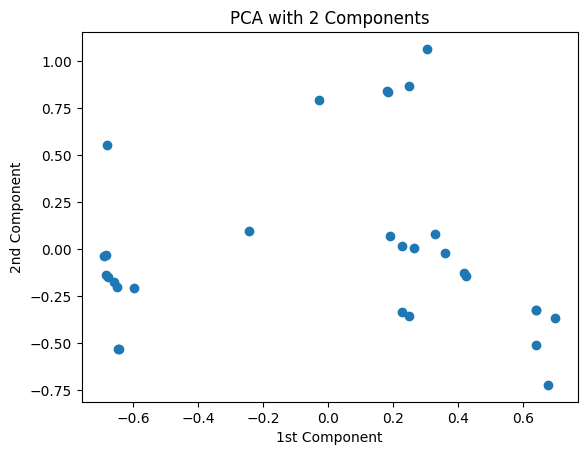

In [36]:
# Ploting all points, without seperating them by classes
X=transformedPoints[:,0] # 1st component
Y=transformedPoints[:,1] # 2nd component
# Scatter plotting the pca transformed points
plt.scatter(X,Y)
plt.title('PCA with 2 Components')
plt.xlabel('1st Component')
plt.ylabel('2nd Component')
plt.show()

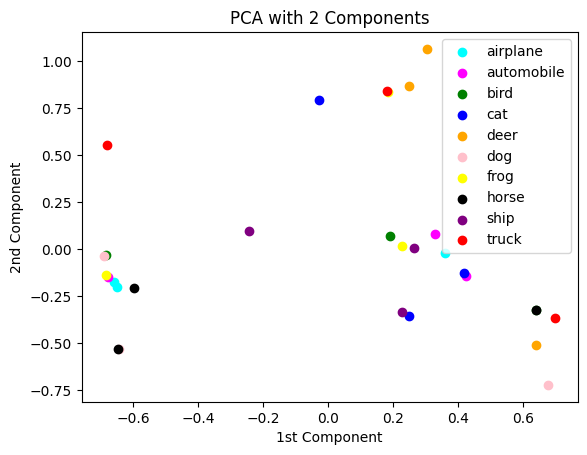

In [37]:
# Ploting all points, by seperating them by classes

colorsOfClasses = [ 'cyan', 'magenta','green', 'blue', 'orange','pink', 'yellow',  'black', 'purple','red']
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    # eg.: 0,1,2 indexed vectors of transformedPoints are class 0, 
    # eg.: 3,4,5 indexed vectors of transformedPoints are class 1, and so on....
    # Since 3 2D vectors are contained in a class j is a tuple representing vectors of a class
    j = tuple([i*3,i*3+1,i*3+2])
    plt.scatter(transformedPoints[j,0], transformedPoints[j,1], marker='o',color=colorsOfClasses[i],  label=classes[i])
plt.legend()
plt.title('PCA with 2 Components')
plt.xlabel('1st Component')
plt.ylabel('2nd Component')
plt.show()